10) Построить нечеткую базу знаний (использовать не менее 3 
лингвистических переменных) для задачи подбора интенсивности занятий 
(учитывать начальный уровень подготовки, объем учебного материала, 
количество человек в группе, необходимый уровень усвоения и т.д.), проверить 
ее на полноту и произвести нечеткий вывод для конкретных значений (выбрать 
случайным образом).

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# переменные для задачи - интенсивность занятий (начальный уровень подготовки(%), объем учебного материала(ч), количество человек в группе(шт), интенсивность)
level_of_preparation = ctrl.Antecedent(np.arange(0, 100, 1), 'level_of_preparation')
amount_edu_material = ctrl.Antecedent(np.arange(32, 256, 1), 'amount_edu_material')
number_of_people = ctrl.Antecedent(np.arange(5,40,1),'number_of_people')

intensity = ctrl.Consequent(np.arange(1, 12, 1), 'intensity')

# используем стандартную функцию принадлежности (треугольник)
intensity.automf(names=['small', 'medium', 'high'])

level_of_preparation['small'] = fuzz.trapmf(level_of_preparation.universe, [0, 4, 10, 25])
level_of_preparation['medium'] = fuzz.trapmf(level_of_preparation.universe, [20, 25, 40, 50])
level_of_preparation['high'] = fuzz.trapmf(level_of_preparation.universe, [35, 50, 67, 75])

amount_edu_material['small'] = fuzz.trapmf(amount_edu_material.universe, [32, 48, 64, 112 ])
amount_edu_material['enough'] = fuzz.trapmf(amount_edu_material.universe,[100, 150, 200, 256])

number_of_people['small'] = fuzz.trapmf(number_of_people.universe, [5, 8, 9, 10])
number_of_people['medium'] = fuzz.trapmf(number_of_people.universe, [9, 12, 16, 18])
number_of_people['high'] = fuzz.trapmf(number_of_people.universe, [16, 20, 25,30])


"\nintensity['small'] = fuzz.trimf(intensity.universe, [1, 1, 5])\nintensity['medium'] = fuzz.trimf(intensity.universe, [4, 5, 7])\nintensity['high'] = fuzz.trimf(intensity.universe, [6, 9, 10])\n"

c:\Users\anast\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


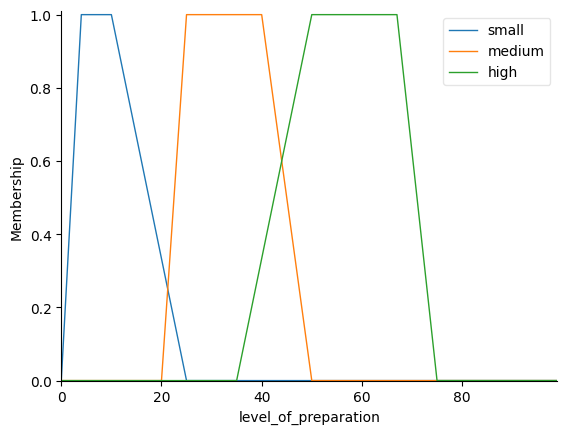

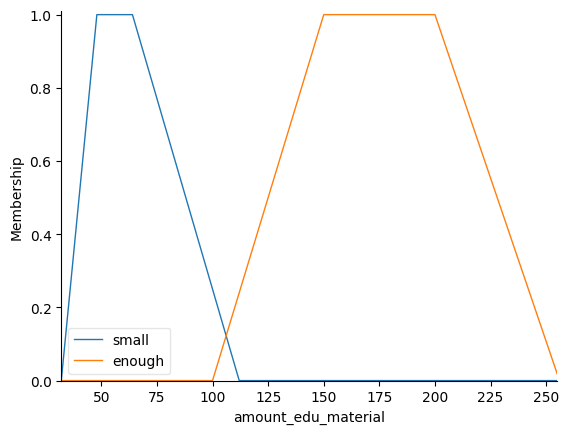

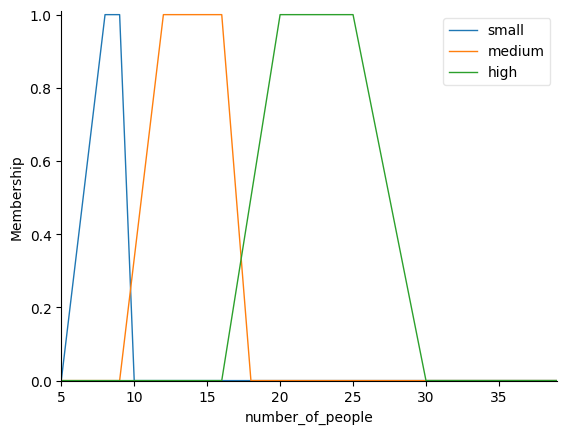

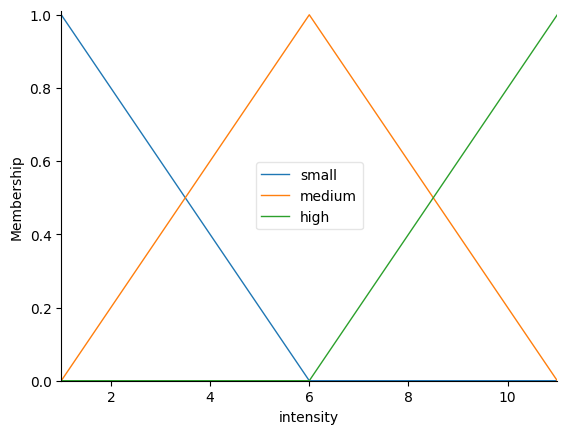

In [2]:
level_of_preparation.view()
amount_edu_material.view()
number_of_people.view()
intensity.view()

In [4]:
rule1 = ctrl.Rule(level_of_preparation['small'] & amount_edu_material['small'] & number_of_people['small'], intensity['small'])
rule2 = ctrl.Rule(level_of_preparation['small'] & amount_edu_material['enough'] & number_of_people['small'], intensity['small'])
rule3 = ctrl.Rule(level_of_preparation['small'] & amount_edu_material['enough'] & number_of_people['medium'], intensity['medium'])
rule4 = ctrl.Rule(level_of_preparation['small'] & amount_edu_material['enough'] & number_of_people['high'], intensity['high'])
rule5 = ctrl.Rule(level_of_preparation['medium'] & amount_edu_material['small'] & number_of_people['small'], intensity['small'])
rule6 = ctrl.Rule(level_of_preparation['medium'] & amount_edu_material['enough'] & number_of_people['medium'], intensity['medium'])
rule7 = ctrl.Rule(level_of_preparation['medium'] & amount_edu_material['enough'] & number_of_people['medium'], intensity['medium'])
rule8 = ctrl.Rule(level_of_preparation['medium'] & amount_edu_material['enough'] & number_of_people['high'], intensity['high'])
rule9 = ctrl.Rule(level_of_preparation['high'] & amount_edu_material['small'] & number_of_people['small'], intensity['medium'])
rule10 = ctrl.Rule(level_of_preparation['high'] & amount_edu_material['enough'] & number_of_people['medium'], intensity['medium'])
rule11 = ctrl.Rule(level_of_preparation['high'] & amount_edu_material['enough'] & number_of_people['medium'], intensity['high'])
rule12 = ctrl.Rule(level_of_preparation['high'] & amount_edu_material['enough'] & number_of_people['high'], intensity['high'])



In [5]:

intensity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
intensity_simulator= ctrl.ControlSystemSimulation(intensity_ctrl)


intensity_simulator.input['level_of_preparation'] = 50
intensity_simulator.input['amount_edu_material'] = 200
intensity_simulator.input['number_of_people'] = 20


intensity_simulator.compute()
print(intensity_simulator.output['intensity'])

9.333333333333334


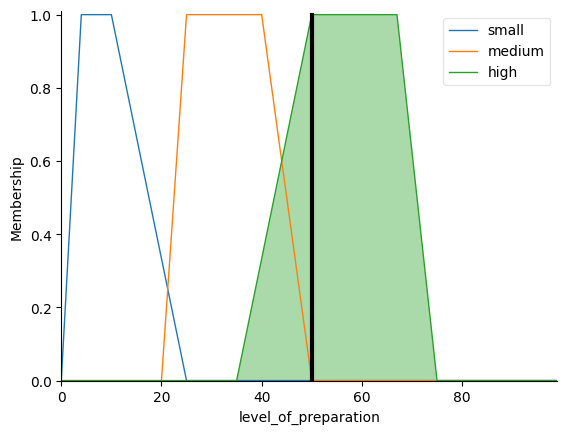

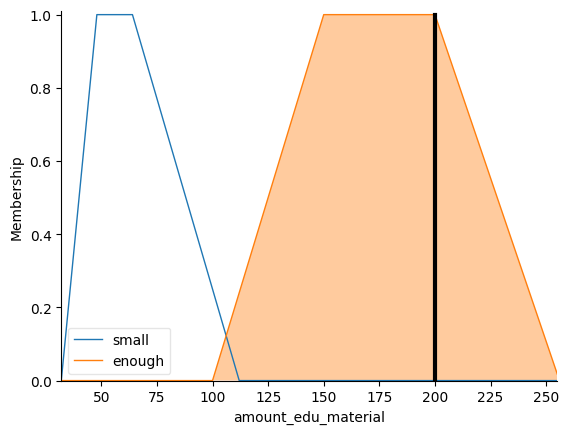

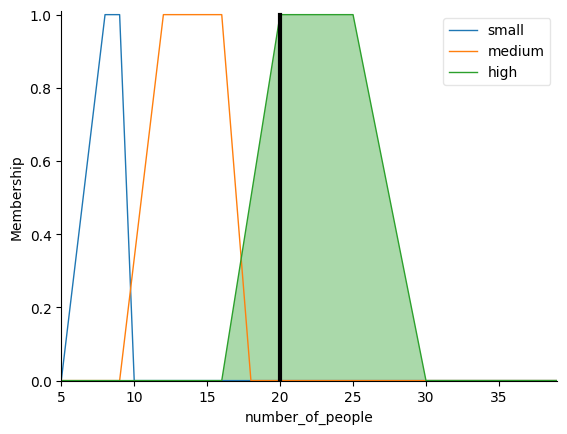

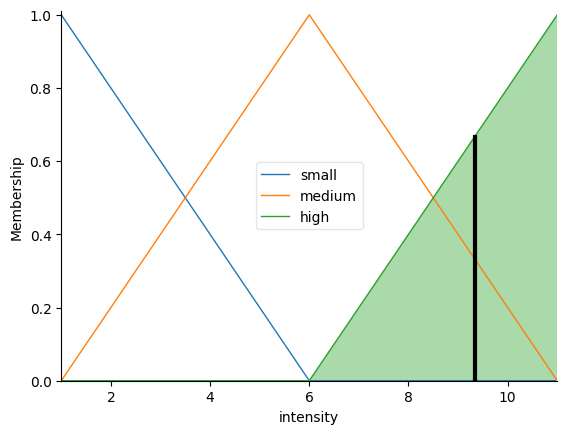

In [6]:
level_of_preparation.view(sim=intensity_simulator)
amount_edu_material.view(sim=intensity_simulator)
number_of_people.view(sim=intensity_simulator)
intensity.view(sim=intensity_simulator)